<a href="https://colab.research.google.com/github/ol287/Learning-from-data/blob/main/week9_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)
____________________________

The dataset `pizza.csv` contains measurements that capture the composition of the pizzas made by different restaurants.

The variables in the data set are:

~~~
brand -- Pizza brand (class label)

id -- id of the sample analysed

mois -- Amount of water per 100 grams in the sample

prot -- Amount of protein per 100 grams in the sample

fat -- Amount of fat per 100 grams in the sample

ash — the amount of ash per 100 grams in the sample. Ash is what remains after the ‘burning’ of food during digestion. The body can burn essential nutrients (carbohydrates, protein and fat) but not minerals (eg calcium, potassium, sodium, magnesium) or trace elements (eg zinc and iron)

sodium -- Amount of sodium per 100 grams in the sample

carb -- Amount of carbohydrates per 100 grams in the sample

cal -- Amount of calories per 100 grams in the sample
~~~

Source: https://www.kaggle.com/shishir349/can-pizza-be-healthy

______________________________

## Part I: PCA using the `sklearn` library

**0.** Run this cell to style your plots!

For more: https://seaborn.pydata.org/tutorial/aesthetics.html

In [1]:
# Import the seaborn library and alias it as sns for easier usage
import seaborn as sns

# Set the visual theme to "talk," which increases font sizes for better readability in presentations
sns.set('talk')

# Set the overall plot style to "ticks," which adds ticks to the axes for a cleaner, more professional look
sns.set_style('ticks')


**1**. Import packages and libraries, and load the file `pizza.csv`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#open the pizza CSV
df = pd.read_csv('pizza.csv')
#print the first 5 rows
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


**2**. Pick two columns of the dataset (except for `brand` and `id`), and make a scatterplot showing where each pizza lies. Try colouring every point according to its brand.

**Tip:** To quickly define N different colours, you can use the following command, but replacing `palette_name` by the name of your chosen colour palette.
~~~
colours = sns.color_palette("palette_name",N)
~~~
Examples of _qualitative_ colour palettes: https://i.stack.imgur.com/am6gN.png

Other examples of palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

In [5]:
#x is calories in each pizza
label_x = 'cal'
#y is protein in each pizza
label_y = 'prot'

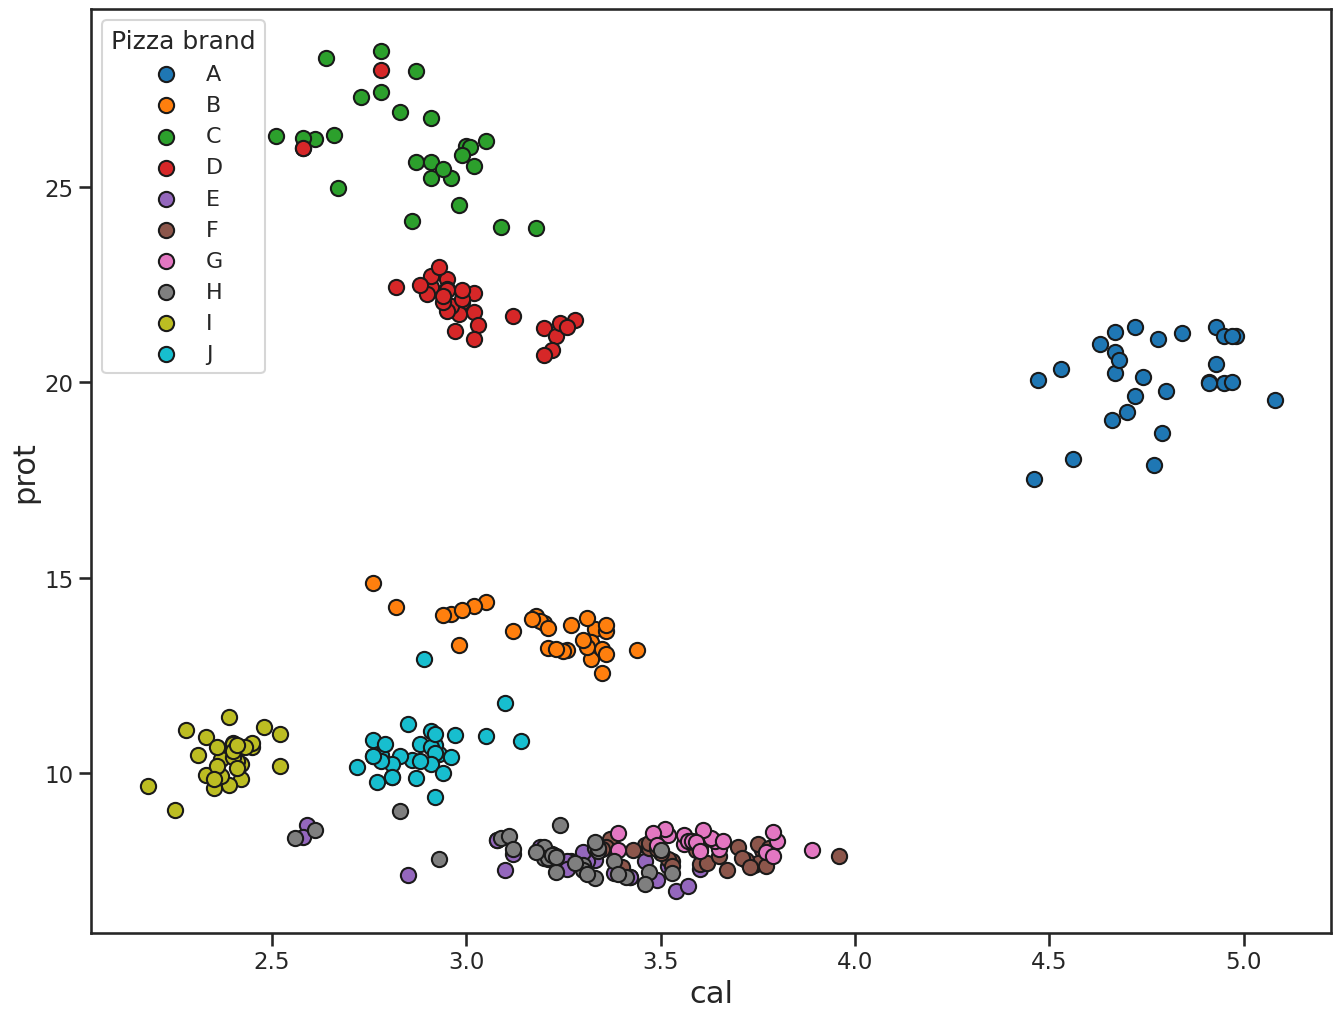

In [20]:
# Create a scatterplot comparing `label_x` and `label_y` columns
# Initialize a figure and axis object with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(16, 12))  # The plot size is set to 16x12 inches

# Extract unique values from the 'brand' column in the dataframe, sorted alphabetically
y_values = sorted(set(df['brand']))

# Create a boolean mask for each unique value in 'brand', identifying rows belonging to each category
row_masks = [df['brand'] == i for i in y_values]

# Generate a color palette with 10 distinct colors using seaborn's "tab10" palette
colours = sns.color_palette("tab10", 10)

# Iterate over each row mask, corresponding color, and brand value
for row_mask, c, y_value in zip(row_masks, colours, y_values):
    # Scatter plot for each category, using the row mask to filter data
    ax.scatter(
        df[row_mask][label_x],       # X-axis values for the category
        df[row_mask][label_y],       # Y-axis values for the category
        color=c,                     # Fill color for the points
        edgecolor='k',               # Black edge color for the points
        s=120,                       # Size of the points
        label=y_value                # Add the brand as a legend label
    )

# Add X-axis label with a font size of 22
ax.set_xlabel(label_x, fontsize=22)

# Add Y-axis label with a font size of 22
ax.set_ylabel(label_y, fontsize=22)

# Add a legend to the plot, locating it automatically in the best position
# The legend shows brand categories, with a title "Pizza brand" and font size of 16
ax.legend(loc='best', title='Pizza brand', fontsize=16)

# Display the plot
plt.show()


**3**. Delete the column `id` from the dataset.

In [7]:
#delete the column id from the dataset
del df['id']

#in this case 300 rows and 8 columns
print(df.shape)

df.head()

(300, 8)


,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


**4**. Create a `y` variable corresponding to the values on the `brand` column, and a `X` variable corresponding to the values on all other columns.

In [8]:
# Extract the 'brand' column from the DataFrame and assign it to the variable y
# This will typically be used as the target (dependent variable) in a machine learning model
y = df['brand']

# Extract all columns from the DataFrame starting from the second column onward (index 1)
# Assign these columns to the variable X, which will represent the feature set (independent variables)
X = df[df.columns[1:]]


**5**. Find the `PCA` function in the scikit-learn documentation, import it, and create a `PCA` object.

In [9]:
# Importing the PCA (Principal Component Analysis) class from the scikit-learn library.
from sklearn.decomposition import PCA

# Initializing a PCA object. By default, this object can be used to perform Principal Component Analysis.
# PCA is a dimensionality reduction technique used to transform high-dimensional data
# into a smaller number of dimensions (principal components) while retaining as much
# of the data's variation as possible.

# In essence, PCA identifies the directions (principal components) along which the data
# varies the most. These directions are computed as orthogonal vectors (eigenvectors)
# corresponding to the largest eigenvalues of the data covariance matrix.
# The result is a lower-dimensional representation of the data that preserves the most
# important patterns or features.

# Key Applications of PCA:
# 1. Reducing the dimensionality of data to improve computational efficiency.
# 2. Visualizing high-dimensional data in 2D or 3D plots.
# 3. Removing noise or redundant features in datasets.
# 4. Preprocessing data for machine learning models.

pca = PCA()  # Creating a default PCA instance. Parameters like `n_components` can be specified for customization.


**6**. Using the `fit_transform` method of the `PCA` function, perform the PCA on `X` and create a variable `df_pca` containing the transformed coordinates. Print the output.

**Tip:** When printing the output, you can also create a pandas DataFrame variable containing the output using `new_coordinates = pd.DataFrame(output)`, and display it with rounded decimal places with `new_coordinates.round(2)`.

In [21]:
# Apply the PCA transformation to the data `X` and reduce its dimensions.
# The `fit_transform` method:
# - Fits the PCA model to the dataset `X`, learning the principal components.
# - Transforms the dataset by projecting it onto the learned principal components.
# The result is a new dataset (`df_pca`) where each column represents a principal component,
# and the number of columns is determined by the `n_components` parameter of PCA.
df_pca = pca.fit_transform(X=X)

# Convert the transformed data (stored as a NumPy array) into a pandas DataFrame for easier handling and analysis.
# Each column in `df_pca` will represent a principal component, while each row corresponds to a data point in the transformed space.
df_pca = pd.DataFrame(df_pca)

# Print the transformed dataset (principal components), rounded to 2 decimal places for better readability.
# Rounding helps when inspecting large datasets or when precision beyond two decimals is unnecessary.
df_pca.round(2)


,0,1,2,3,4,5,6
0,-24.95,-26.81,-0.12,0.05,0.17,-0.01,0.00
1,-24.61,-25.66,-0.03,0.38,0.16,-0.01,-0.00
2,-24.94,-26.93,-1.89,0.02,-0.01,-0.01,-0.00
3,-24.33,-23.52,-1.31,-0.11,0.10,-0.01,-0.01
4,-23.87,-22.65,0.32,-0.03,0.18,-0.01,-0.00
...,...,...,...,...,...,...,...
295,2.61,5.29,-1.79,0.12,0.09,0.37,-0.02
296,1.45,2.96,-1.26,0.04,0.05,-0.00,-0.00
297,3.54,5.67,-1.27,0.30,0.05,-0.00,-0.00
298,1.77,8.55,-2.40,0.21,0.01,-0.00,-0.00


**7**. Still consulting the documentation, save the PCA `components_` variable containing the Principal Components (the eigenvectors) and display it.

In [11]:
# Retrieve the principal component weights (also known as eigenvectors).
# The `pca.components_` attribute contains the weights of the original features
# for each principal component. These weights indicate the contribution of each
# original feature to the principal components.
# - Each row in `pca.components_` corresponds to a principal component.
# - Each column represents the weight of a specific feature in that component.
# This is useful for interpreting how the original features contribute to the new
# principal components.

# Convert the principal component weights (eigenvectors) into a pandas DataFrame
# for better readability and analysis. Each row represents a principal component,
# and each column represents a feature's contribution to that component.
df_pca_loadings = pd.DataFrame(pca.components_)

# Display the DataFrame of principal component weights (eigenvectors).
df_pca_loadings


,0,1,2,3,4,5,6
0,-0.276963,-0.266941,-0.278934,-0.055434,-0.011142,0.878084,-0.000603
1,0.747074,-0.055733,-0.657845,-0.040604,-0.023814,0.006818,-0.061254
2,-0.352016,0.809718,-0.467976,0.022225,-0.026245,-0.012469,-0.010062
3,-0.195900,-0.255747,-0.259802,0.871443,0.201453,-0.164525,-0.040678
4,0.059475,0.083719,0.035776,-0.166634,0.978316,0.057470,0.001497
5,0.440974,0.443490,0.448624,0.450220,-0.030463,0.444405,-0.080452
6,0.069892,0.029904,-0.019821,0.070043,0.002565,0.029977,0.993990


**8**. Using the code below, make a heatmap showing how each principal component is a linear combination of the original components.

~~~
fig, axis = plt.subplots(figsize=(12,4))

three_rows = df_pca_loadings.head(3)

sns.heatmap(three_rows, annot=True, ax=axis, cmap='RdBu')

axis.set_xticklabels(X.columns)

axis.set_yticklabels(['PC1','PC2','PC3'])

plt.show()
~~~

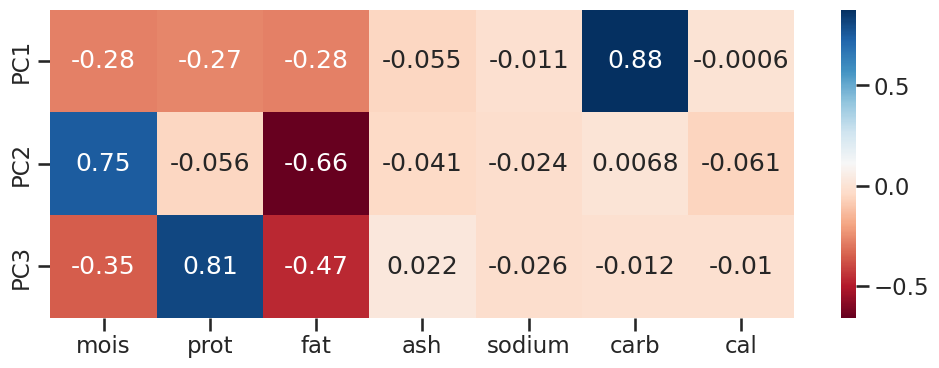

In [12]:
# Create a figure and axis with specified size for the heatmap
fig, axis = plt.subplots(figsize=(12, 4))

# Select the first three principal components (PC1, PC2, PC3) for visualization
three_rows = df_pca_loadings.head(3)

# Plot a heatmap to visualize the contribution (weights) of original features to the principal components
sns.heatmap(three_rows, annot=True, ax=axis, cmap='RdBu')

# Set the x-axis labels to the feature names (columns of X)
axis.set_xticklabels(X.columns)

# Set the y-axis labels to indicate the principal components (PC1, PC2, PC3)
axis.set_yticklabels(['PC1', 'PC2', 'PC3'])

# Display the heatmap
plt.show()


**9**. Still consulting the documentation, find the `explained_variance_ratio_` variable and print the percentage of the variance ratio explained by the individual components. Can you tell how much % of the variation in the data is explained by the first two principal components?

In [ ]:
#explained_variance_ratio_ is an attribute of PCA that represents the proportion of the dataset's total variance explained by each principal component.
#It helps assess how much information each component retains from the original data.
print(pca.explained_variance_ratio_.round(2)[:10])

[0.78 0.19 0.03 0.   0.   0.   0.  ]


**10**. Repeat the scatterplot as before, but using the first two principal components, colouring each point according to their pizza brand.

In [22]:
from scipy.spatial import ConvexHull

# The encircle function enables encircling the points within the cluster.
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

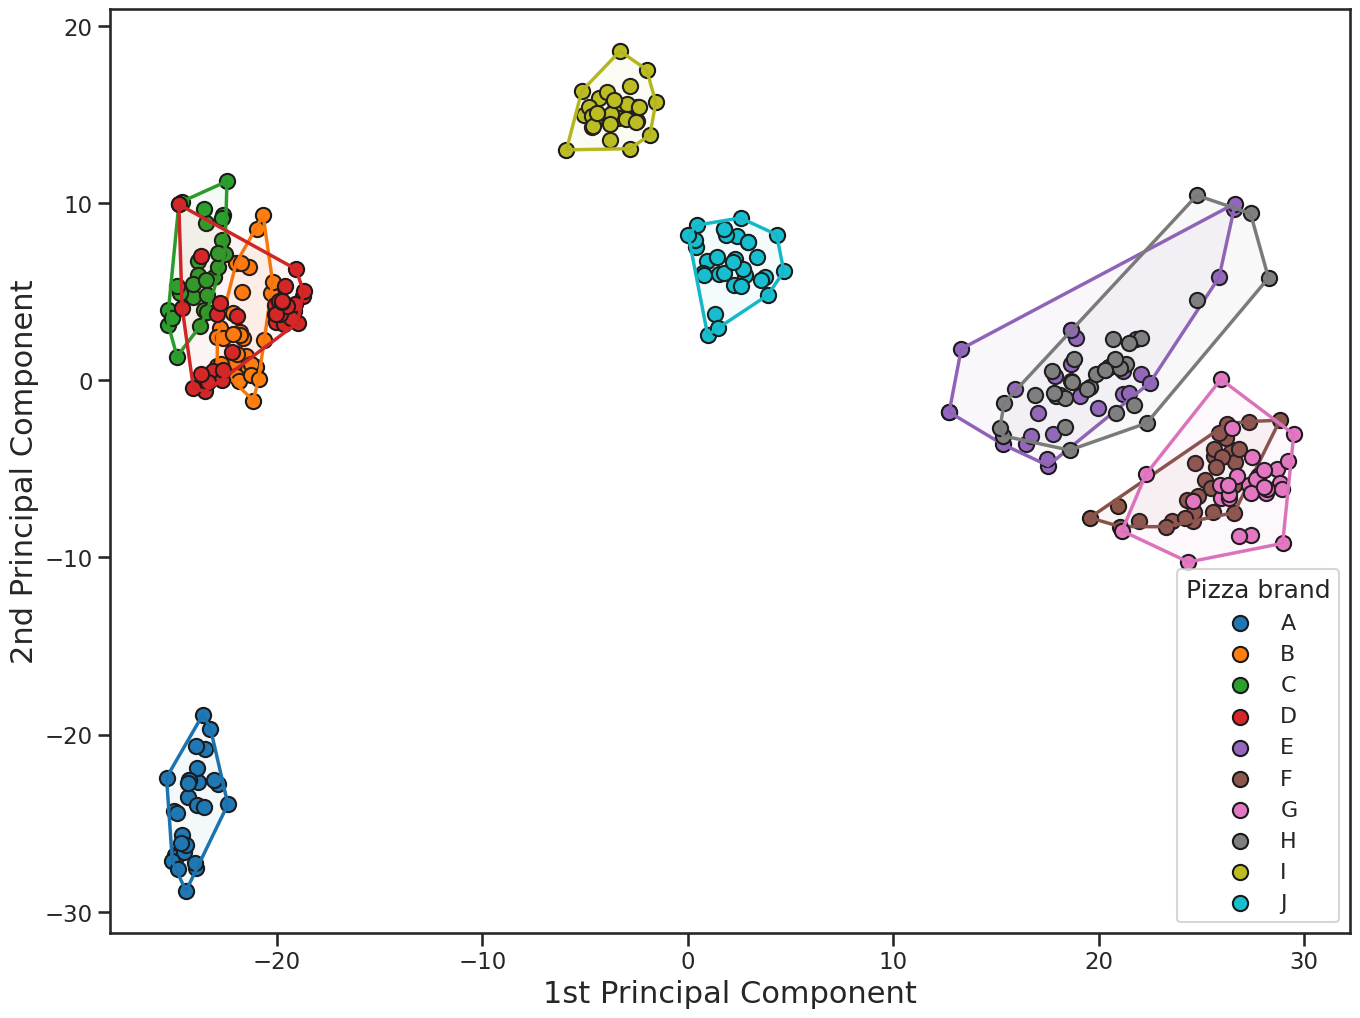

In [23]:
# Create a scatterplot of the first two principal components (PC1 and PC2) to visualize the data distribution.
fig, ax = plt.subplots(1, 1, figsize=(16, 12))  # Set up a figure and axis with specified size.

# Create a sorted list of unique categories in `y` for grouping.
y_values = sorted(set(y))

# Generate row masks to filter the data for each category in `y`.
row_masks = [y == i for i in y_values]

# Define a color palette with 10 distinct colors for different categories.
colours = sns.color_palette("tab10", 10)

# Loop through each category, its corresponding mask, and assigned color.
for row_mask, c, y_value in zip(row_masks, colours, y_values):
    # Scatterplot for the current category using the first two principal components.
    ax.scatter(df_pca[row_mask][0], df_pca[row_mask][1],
               color=c, edgecolor='k', s=120, label=y_value)

    # Highlight boundaries around points for the current category (outer edge).
    encircle(df_pca[row_mask][0], df_pca[row_mask][1],
             ec=c, fc="none", linewidth=2.5)

    # Add shading to softly highlight the group.
    encircle(df_pca[row_mask][0], df_pca[row_mask][1],
             ec="k", fc=c, alpha=0.05)

# Set labels for the x and y axes corresponding to the principal components.
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)

# Add a legend to label the categories, with a title and font size.
ax.legend(loc='best', title='Pizza brand', fontsize=16)

# Display the scatterplot.
plt.show()


**11**. Try running a clustering algorithm on the PCA-processed data. How many clusters does your clustering algorithm identify?

___________

## Part II: Implementation of PCA from scratch

**11**. Taking the same `X` dataset matrix as defined above, standardise each column: subtract the mean, divide by the standard deviation, and save the result in a new variable `X_standardised`.

In this new variable, every column should have mean **0** and standard deviation **1**.

In [15]:
X_standardised = (X - X.mean())/X.std()
X_standardised

,mois,prot,fat,ash,sodium,carb,cal
0,-1.369526,1.252089,2.745255,1.950635,2.971721,-1.225463,2.675659
1,-1.299391,1.225669,2.636070,2.131776,3.025723,-1.211598,2.530505
2,-1.314046,1.028292,2.846640,1.927007,2.593708,-1.223800,2.707915
3,-1.083752,1.053158,2.551397,1.698611,2.539707,-1.191630,2.369224
4,-1.090033,1.228777,2.386506,1.722238,2.620709,-1.170554,2.256327
...,...,...,...,...,...,...,...
295,0.419443,-0.358008,-0.359810,-0.112807,-0.025381,0.138396,-0.582226
296,0.235207,-0.246110,-0.197148,-0.160061,0.001620,0.072393,-0.275791
297,0.381758,-0.367333,-0.467880,-0.160061,-0.079383,0.172783,-0.566098
298,0.701030,-0.457474,-0.562581,-0.246694,-0.295390,0.089033,-0.824148


**12**. Compute the covariance matrix of `X_standardised`. This can by done by calling the `.cov()` function on a pandas dataframe.

In [16]:
#A covariance matrix is a square matrix that summarizes the covariances (measure of linear relationship) between pairs of variables in a dataset.
#Each element represents how much two variables vary together, with diagonal elements showing the variance of individual variables.








cov_matrix = X_standardised.cov()

cov_matrix.head()

,mois,prot,fat,ash,sodium,carb,cal
mois,1.000000,0.360248,-0.171318,0.265556,-0.102279,-0.591802,-0.764441
prot,0.360248,1.000000,0.498002,0.823844,0.429130,-0.853542,0.070258
fat,-0.171318,0.498002,1.000000,0.791634,0.933325,-0.640238,0.764567
ash,0.265556,0.823844,0.791634,1.000000,0.808122,-0.898988,0.326468
sodium,-0.102279,0.429130,0.933325,0.808122,1.000000,-0.620176,0.671958


**13**. Find what function in python is used to compute eigenvalues and eigenvectors of a matrix, and use it to compute the eigenvalues and eigenvectors of the covariance matrix.

In [17]:
# Import the eig function to compute eigenvalues and eigenvectors from NumPy's linear algebra module.
from numpy.linalg import eig

# Calculate the eigenvalues and eigenvectors of the covariance matrix.
# - Eigenvalues represent the amount of variance captured by each principal component.
#   Larger eigenvalues correspond to components that explain more variance in the data.
# - Eigenvectors are the directions (or axes) in the feature space that define the principal components.
#   Each eigenvector points in the direction of maximum variance for its corresponding eigenvalue.

eigenvalues, eigenvectors = eig(cov_matrix)

# Print the eigenvalues to inspect the variance explained by each component.
print(eigenvalues)


[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878033e-06]


**14**. To produce the Principal Components, take the dot product of `X_standardised` and the eigenvector matrix using the `np.dot` function.

In [24]:
# Project the standardized data onto the eigenvectors to compute the principal components.
X_pca = np.dot(X_standardised, eigenvectors)

# Convert the resulting principal components into a pandas DataFrame for better readability.
df_pca_calc = pd.DataFrame(X_pca)

# Display the first few rows of the principal components, rounded to 2 decimal places.
df_pca_calc.round(2).head()


,0,1,2,3,4,5,6
0,5.00,-2.67,-0.04,0.14,0.28,-0.00,0.0
1,5.02,-2.53,-0.10,0.35,0.21,0.00,0.0
2,4.80,-2.67,-0.08,-0.11,-0.03,0.01,0.0
3,4.46,-2.28,-0.12,-0.05,0.17,0.01,0.0
4,4.46,-2.16,-0.00,0.12,0.31,0.00,0.0


**15**. Plot the scatterplot again, using the newly calculated PCA. Did it work? Did it produce the same results?

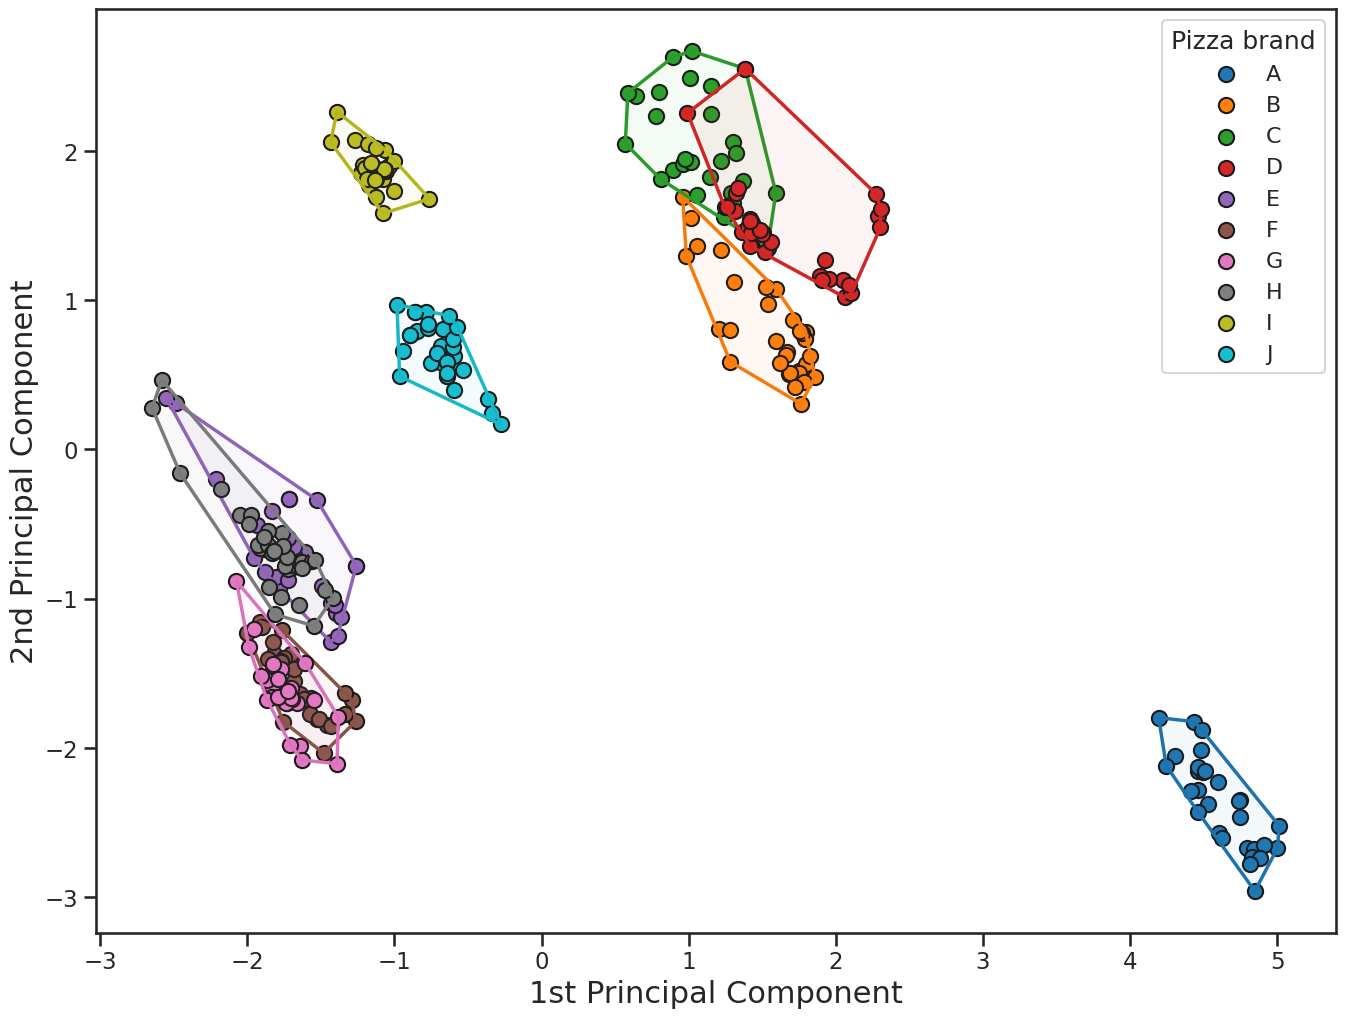

In [25]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
y_values = sorted(set(y))
row_masks = [ y==i for i in y_values ]

# Colours
colours = sns.color_palette("tab10",10)


for row_mask, c, y_value in zip(row_masks, colours, y_values):
    # Plot
    ax.scatter(df_pca_calc[row_mask][0], df_pca_calc[row_mask][1],
               color=c, edgecolor='k', s=120, label=y_value)

    # Encircle the boundaries
    encircle(df_pca_calc[row_mask][0], df_pca_calc[row_mask][1],
             ec=c, fc="none", linewidth=2.5)

    # Shading
    encircle(df_pca_calc[row_mask][0], df_pca_calc[row_mask][1],
             ec="k", fc=c, alpha=0.05)

# Labels
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Pizza brand', fontsize=16)

plt.show()